In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [129]:
!pip install pyarrow

In [130]:
jan_data = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
feb_data = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

### Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data

In [131]:
jan_data.shape

(2463931, 19)

### Question 2: Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data

In [132]:
jan_data['duration'] = jan_data.tpep_dropoff_datetime - jan_data.tpep_pickup_datetime
jan_data['duration'] = jan_data['duration'].apply(lambda td: td.total_seconds()/60)

In [133]:
np.std(jan_data.duration)

46.44529571272228

### Question 3: Fraction of the records left after dropping the outliers

In [134]:
old_dim = jan_data.shape[0]

jan_data = jan_data[(jan_data.duration >=1) & (jan_data.duration <=60)]

jan_data.shape[0] / old_dim * 100

98.27547930522405

/tmp/ipykernel_11475/1246971752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jan_data.duration)


<Axes: xlabel='duration', ylabel='Density'>

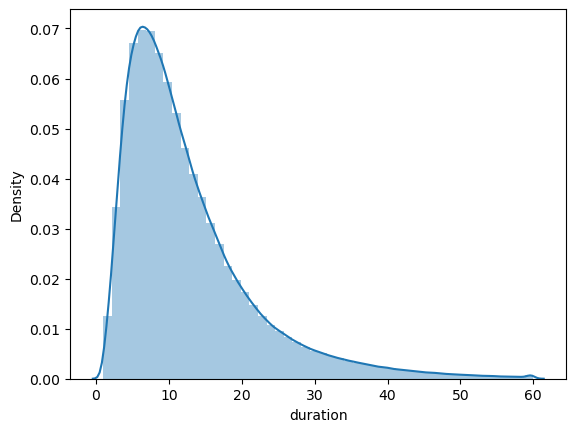

In [135]:
sns.distplot(jan_data.duration)

### Question 4: Dimensionality after OHE

In [136]:
categorical = ["PULocationID","DOLocationID"]
numerical = ['trip_distance']

In [137]:
jan_data[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [138]:
jan_data[categorical] = jan_data[categorical].astype(str)
jan_data[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [139]:
train_dicts = jan_data[categorical+numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
target = 'duration'
y_train = jan_data[target].values


X_train.shape

(2421440, 516)

### Question 5: RMSE on train 

In [140]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

/tmp/ipykernel_11475/1351390157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_11475/1351390157.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


<Axes: ylabel='Density'>

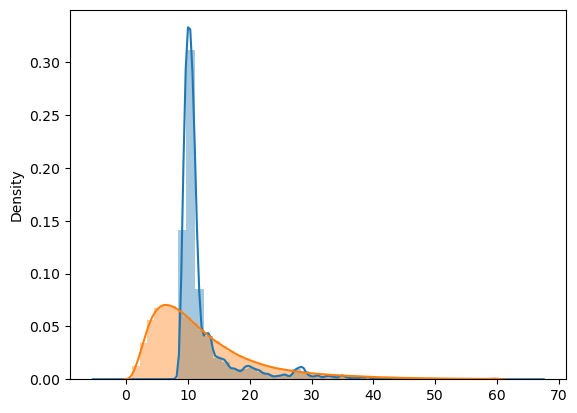

In [141]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

In [142]:
mean_squared_error(y_train, y_pred, squared=False)

7.001496179368578

### Question 6: RMSE on validation

In [143]:
feb_data['duration'] = feb_data.tpep_dropoff_datetime - feb_data.tpep_pickup_datetime
feb_data['duration'] = feb_data['duration'].apply(lambda td: td.total_seconds()/60)
feb_data = feb_data[(feb_data.duration >=1) & (feb_data.duration <=60)]

categorical = ["PULocationID","DOLocationID"]
numerical = ['trip_distance']
feb_data[categorical] = feb_data[categorical].astype(str)

In [144]:
val_dicts = feb_data[categorical+numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
target = 'duration'
y_val = feb_data[target].values

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.795498243201117

In [146]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

8.999061373050163

In [147]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.844279249722729